<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S12/EVA4_S12_tinyimagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Import Libraries

In [ ]:
%matplotlib inline

import torch
!pip install torchsummary
from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau

##Mount Google Drive to get files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


##Add Google Drive path to system path

In [ ]:
os.chdir('./drive/My Drive/Colab Notebooks/S12/')

!ls

albumentation_transforms.py  engine			  train_test_loader.py
config_tinyimagenet.py	     EVA4_S12_tinyimagenet.ipynb  utils
datasets		     models			  visualization


##Import python files

In [ ]:
import train_test_loader as ttl
import config_tinyimagenet as cfg
from models import ResNet18
from torch.optim.lr_scheduler import OneCycleLR
from engine import LRFinder
from visualization import visualise_acc as vis
from visualization import plot_timgnt as timg
import utils.gradcam as gc
import utils.get_images as gc_img

from tqdm import tqdm
if hasattr(tqdm, '_instances'):
  tqdm._instances.clear()

##Fetching Config and loaders

In [ ]:
args=cfg.Config()
train_loader, test_loader, dataset = ttl.get_train_test(args)


  0%|          | 0/151 [07:23<?, ?it/s]

CUDA Available? True
/content/drive/My Drive/Colab Notebooks/S12/datasets/.cache/tinyimagenet
Files already downloaded.


/content/drive/My Drive/Colab Notebooks/S12/datasets/.cache/tinyimagenet
Files already downloaded.
/content/drive/My Drive/Colab Notebooks/S12/datasets/.cache/tinyimagenet
Files already downloaded.


##Visualise sample images

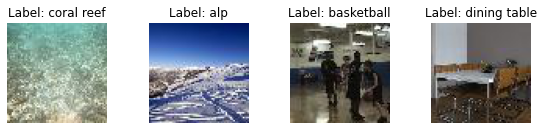

In [ ]:
if dataset is not None:
  args.classes=dataset.classes
  timg.visualise_tinyimgnt(dataset,args)

##Load Model and view summary

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18(num_classes=len(dataset.classes)).to(device)
model.summary(dataset.image_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

##Set scheduler

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer,patience=2,verbose=True, min_lr=1e-6)

##Train and Test model

In [ ]:
if hasattr(tqdm, '_instances'):
  tqdm._instances.clear()
  
model.fit(train_loader, optimizer, criterion, device=device, epochs=args.epochs, val_loader=test_loader,callbacks=[scheduler])

  0%|          | 0/602 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0319, Accuracy: 4082/33000 (12.37%)

Epoch 2:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 5980/33000 (18.12%)

Epoch 3:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 8012/33000 (24.28%)

Epoch 4:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 9463/33000 (28.68%)

Epoch 5:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 8942/33000 (27.10%)

Epoch 6:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 10688/33000 (32.39%)

Epoch 7:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 12475/33000 (37.80%)

Epoch 8:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 12670/33000 (38.39%)

Epoch 9:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 13317/33000 (40.35%)

Epoch 10:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 12920/33000 (39.15%)

Epoch 11:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 13848/33000 (41.96%)

Epoch 12:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 13936/33000 (42.23%)

Epoch 13:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 14854/33000 (45.01%)

Epoch 14:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 15174/33000 (45.98%)

Epoch 15:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 15209/33000 (46.09%)

Epoch 16:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 15148/33000 (45.90%)

Epoch 17:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 15134/33000 (45.86%)

Epoch 18:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 15753/33000 (47.74%)

Epoch 19:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 15439/33000 (46.78%)

Epoch 20:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 14712/33000 (44.58%)

Epoch 21:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 16108/33000 (48.81%)

Epoch    21: reducing learning rate of group 0 to 1.0000e-03.
Epoch 22:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 18535/33000 (56.17%)

Epoch 23:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18618/33000 (56.42%)

Epoch 24:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18667/33000 (56.57%)

Epoch 25:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 18656/33000 (56.53%)

Epoch 26:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18685/33000 (56.62%)

Epoch    26: reducing learning rate of group 0 to 1.0000e-04.
Epoch 27:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18747/33000 (56.81%)

Epoch 28:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18763/33000 (56.86%)

Epoch 29:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18789/33000 (56.94%)

Epoch 30:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18763/33000 (56.86%)

Epoch 31:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18781/33000 (56.91%)

Epoch 32:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18772/33000 (56.88%)

Epoch    32: reducing learning rate of group 0 to 1.0000e-05.
Epoch 33:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18807/33000 (56.99%)

Epoch 34:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18764/33000 (56.86%)

Epoch 35:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18752/33000 (56.82%)

Epoch    35: reducing learning rate of group 0 to 1.0000e-06.
Epoch 36:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18758/33000 (56.84%)

Epoch 37:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18757/33000 (56.84%)

Epoch 38:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18802/33000 (56.98%)

Epoch 39:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18755/33000 (56.83%)

Epoch 40:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18790/33000 (56.94%)

Epoch 41:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18799/33000 (56.97%)

Epoch 42:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18791/33000 (56.94%)

Epoch 43:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18782/33000 (56.92%)

Epoch 44:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18774/33000 (56.89%)

Epoch 45:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18744/33000 (56.80%)

Epoch 46:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18780/33000 (56.91%)

Epoch 47:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 18752/33000 (56.82%)

Epoch 48:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18762/33000 (56.85%)

Epoch 49:


  0%|          | 0/602 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 18766/33000 (56.87%)

Epoch 50:


Loss=0.7063 Batch_id=601 Accuracy=66.76: 100%|██████████| 602/602 [07:49<00:00,  1.28it/s]



Test set: Average loss: 0.0141, Accuracy: 18763/33000 (56.86%)



In [ ]:
#save model
torch.save(model.state_dict(),'model.pth')

##View Train vs Test accuracies

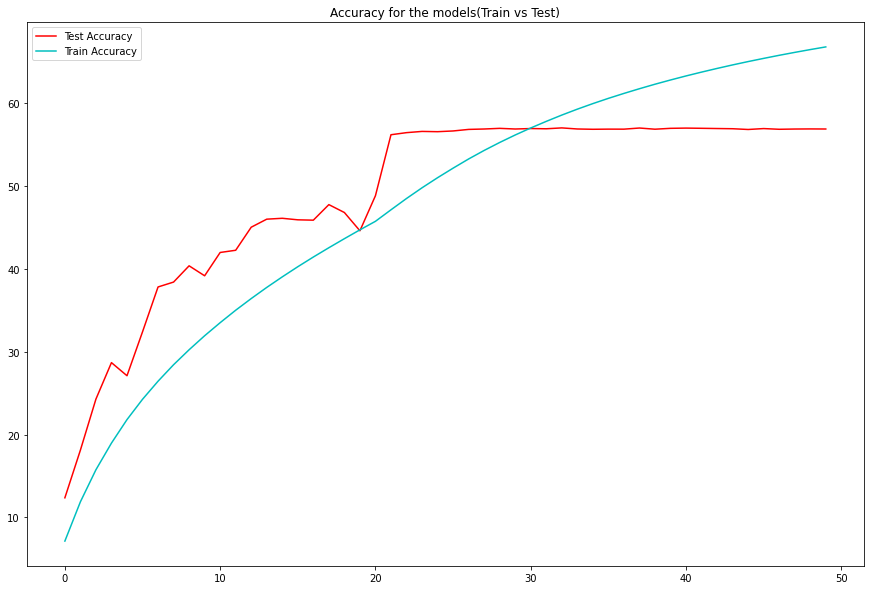

In [ ]:
vis.plot_acc(test_accuracy=model.learner.val_accuracies, train_accuracy=model.learner.train_accuracies)

##Gradcam for 3 random misclassified images


--GRADCAM FOR MISCLASSIFIED IMAGES--


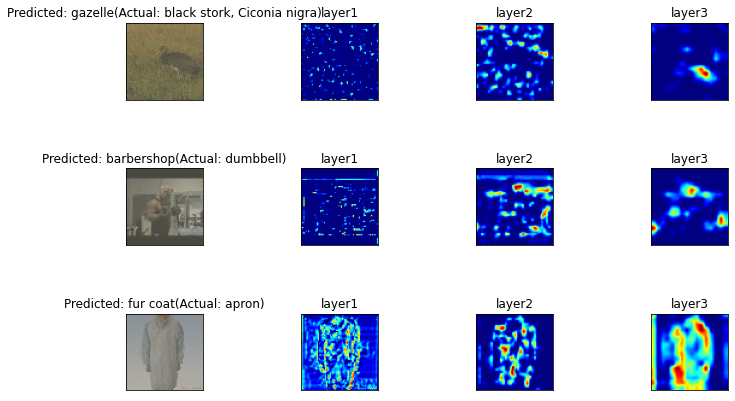

In [ ]:
misclass = gc_img.get_images(model, device, test_loader, batch_size=args.batch_size, num_imgs=3)
target_layers = ["layer1", "layer2", "layer3"]
viz_cam = gc.VisualizeCam(model, args.classes, target_layers)

incorrect_pred_imgs = []
inc_image_for_gradcam = []
for i in range(len(misclass)):
    incorrect_pred_imgs.append(torch.as_tensor(misclass[i][0]))
    inc_image_for_gradcam.append(misclass[i])

print('\n--GRADCAM FOR MISCLASSIFIED IMAGES--')
viz_cam(torch.stack(incorrect_pred_imgs), inc_image_for_gradcam, target_layers, metric="incorrect")
